In [1]:
import numpy as np
import pandas as pd
import sys
#sys.path.append('../sasmodels/sasmodels/')
import os
import numpy as np
import matplotlib.pyplot as plt
from bumps.names import Parameter
from bumps.fitters import fit

from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment

import bumps
import sasmodels
# uncomment and edit line below to add path to the sasview source code
# sys.path.append("/path/to/sasview/src")
#import sas

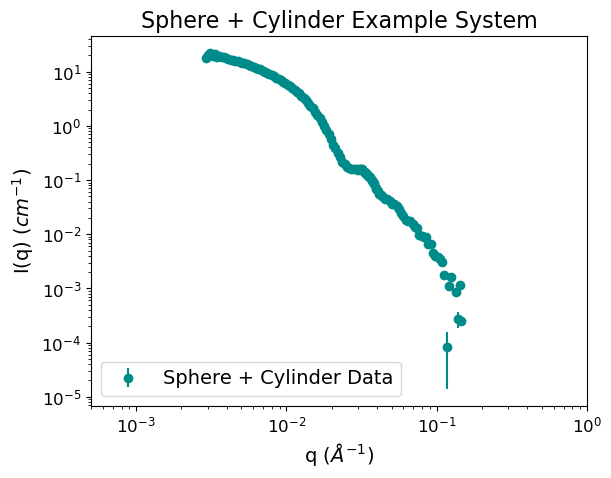

In [5]:
data_np = np.load('../Data/SANS/sub_data/np_files/r27730_Si_DOPC_OA00_D2O89_1D_combined.txt.npy')[0:-50, :]
mask = np.where(data_np[:,1]>0)[0] # removing points that may be below zero due to noise
data = sasmodels.data.Data1D(x=data_np[mask,0], y=data_np[mask,1], dy=data_np[mask,2])

plt.errorbar(data.x, data.y, yerr=data.dy, fmt='o', color='darkcyan', label='Sphere + Cylinder Data')

# x-axis
plt.xlim(5e-4,1e0)
plt.xscale('log')
plt.xlabel('q ($\\AA^{-1}$)',fontsize=14)
plt.xticks(fontsize=12)

# y-axis
#plt.ylim(1e-3,1e6)
plt.yscale('log')
plt.ylabel('I(q) ($cm^{-1}$)',fontsize=14)
plt.yticks(fontsize=12)

plt.title('Sphere + Cylinder Example System',fontsize=16)
plt.legend(fontsize=14)

plt.show()

In [6]:
kernel = sasmodels.core.load_model("core_shell_sphere+core_shell_sphere")
Model(model=kernel).parameters()

{'scale': Parameter(scale),
 'background': Parameter(background),
 'A_scale': Parameter(A_scale),
 'A_radius': Parameter(A_radius),
 'A_radius_pd': Parameter(A_radius_pd),
 'A_radius_pd_n': Parameter(A_radius_pd_n),
 'A_radius_pd_nsigma': Parameter(A_radius_pd_nsigma),
 'A_thickness': Parameter(A_thickness),
 'A_thickness_pd': Parameter(A_thickness_pd),
 'A_thickness_pd_n': Parameter(A_thickness_pd_n),
 'A_thickness_pd_nsigma': Parameter(A_thickness_pd_nsigma),
 'A_sld_core': Parameter(A_sld_core),
 'A_sld_shell': Parameter(A_sld_shell),
 'A_sld_solvent': Parameter(A_sld_solvent),
 'B_scale': Parameter(B_scale),
 'B_radius': Parameter(B_radius),
 'B_radius_pd': Parameter(B_radius_pd),
 'B_radius_pd_n': Parameter(B_radius_pd_n),
 'B_radius_pd_nsigma': Parameter(B_radius_pd_nsigma),
 'B_thickness': Parameter(B_thickness),
 'B_thickness_pd': Parameter(B_thickness_pd),
 'B_thickness_pd_n': Parameter(B_thickness_pd_n),
 'B_thickness_pd_nsigma': Parameter(B_thickness_pd_nsigma),
 'B_sld_core

# steps: 167, # draws: 10020
step 1 cost 17010728.571(60)
                                A_radius ....|.....        130 in (10,300)
                             A_radius_pd ...|......        0.2 in (0,0.5)
                                 A_scale |......... 0.000500009 in (0,0.01)
                             A_thickness ....|.....         40 in (30,50)
                             B_thickness ....|.....         40 in (30,50)
                                   scale |......... 0.000500091 in (0,0.1)
step 19 cost 17008720.123(60)
step 37 cost 16064743.208(60)
step 55 cost 100900.323(60)
step 73 cost 37911.494(60)
step 90 cost 34770.564(60)
step 108 cost 20123.161(60)
step 127 cost 13262.766(60)
step 145 cost 13176.376(60)
step 164 cost 13176.376(60)
step 182 cost 13176.376(60)
step 201 cost 11797.123(60)
step 220 cost 11797.123(60)
step 239 cost 11797.123(60)
step 258 cost 11142.536(60)
final chisq 11142.536(60)
=== Uncertainty from curvature:     name   value(unc.) ===
               

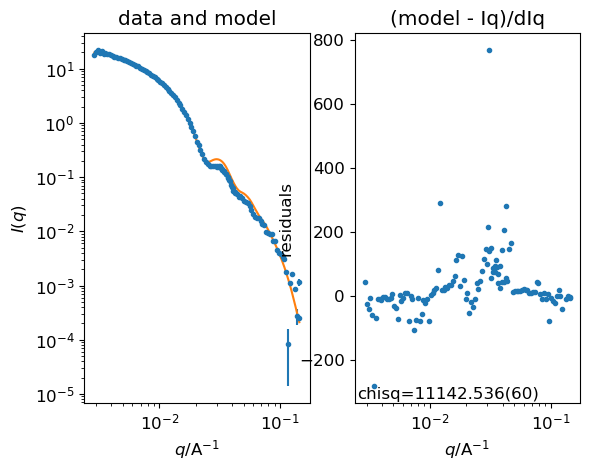

In [7]:
scale = Parameter(0.0005, limits=(0,99999), name='scale').range(0,0.1) 
background = Parameter(0.00, limits=(0,99999),name='incoherent background')

# scattering length densities for our scattering particles and solvent
A_scale = Parameter(0.0005, limits=(0,99999), name='A_scale').range(0, 0.01) 
A_radius = Parameter(130, limits=(0,10000), name='A_radius').range(10, 300)  
A_radius_pd = Parameter(0.2, name='A_radius_pd').range(0,0.5) 
A_radius_pd_type = 'lognormal'
A_thickness = Parameter(40, limits=(0,100),name='A_thickness').range(30,50) 
A_sld_shell = Parameter(0.09, name='A_sld_shell')
A_sld_solvent = Parameter(5.58, name='A_sld_solvent')
A_sld_core = Parameter(5.58, name='A_sldcore')

B_scale = scale - A_scale
B_radius = Parameter(123, limits=(0,10000),name='B_radius')
B_radius_pd = Parameter(0.15, name='B_radius_pd')
B_radius_pd_type = 'lognormal'
B_thickness = Parameter(40, limits=(0,100),name='B_thickness').range(30,50) 
B_sld_core = Parameter(3.48, name='B_sld_core')
B_sld_solvent = Parameter(5.58, name='B_sld_solvent')
B_sld_shell = Parameter(0.09, name='B_sld_shell')


plt.rcParams.update({'font.size': 12})
model = Model(model=kernel,
            scale = scale,
            background = background,
            A_scale = A_scale,
            A_sld_shell = A_sld_shell,
            A_sld_solvent = A_sld_solvent,
            A_sld_core = A_sld_core,
            A_radius = A_radius,
            A_radius_pd = A_radius_pd,
            A_radius_pd_type = A_radius_pd_type,
            A_thickness = A_thickness,

            B_scale = B_scale,
            B_radius = B_radius,
            B_radius_pd = B_radius_pd,
            B_radius_pd_type = B_radius_pd_type,
            B_thickness = B_thickness,
            B_sld_core = B_sld_core,
            B_sld_solvent = B_sld_solvent,
            B_sld_shell = B_sld_shell,
             )

experiment = sasmodels.bumps_model.Experiment(data=data, model=model)
problem = bumps.fitproblem.FitProblem(experiment)
results = bumps.fitters.fit(problem, method='dream', verbose=True)
problem.plot()

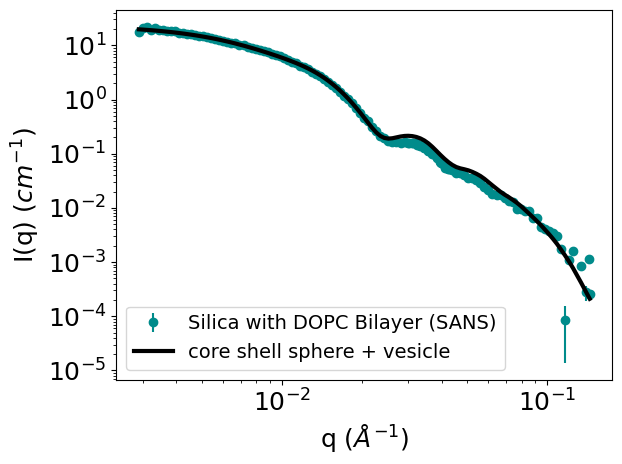

In [8]:
plt.rcParams.update({'font.size': 18})
plt.errorbar(data.x, data.y, yerr=data.dy, fmt='o', color='darkcyan', label='Silica with DOPC Bilayer (SANS)')
plt.errorbar(data.x, problem.fitness.theory(), fmt='-', color='black', label='core shell sphere + vesicle', linewidth=3)
# x-axis
#plt.xlim(5e-4,1e0)
plt.xscale('log')
plt.xlabel('q ($\\AA^{-1}$)')
plt.xticks()
# y-axis
#plt.ylim(1e-3,1e6)
plt.yscale('log')
plt.ylabel('I(q) ($cm^{-1}$)')
plt.yticks()
plt.legend(fontsize=14)
#plt.savefig('../Figures/Si_DOPC_CSS_model.png', dpi=600, bbox_inches="tight")

In [9]:
model = np.hstack((data.x.reshape(-1,1), problem.fitness.theory().reshape(-1,1)))
#np.save('../Figures/core_shell_sphere_model.npy', model)

In [10]:
print('A_radius: ', A_radius.value)
print('A_radius_pd: ', A_radius_pd.value)
print('A_scale: ', A_scale.value)
print('A_thickness: ', A_thickness.value)
print('B_thickness: ', B_thickness.value)
print('scale: ', scale.value)

A_radius:  202.92711369201618
A_radius_pd:  0.3232210990314485
A_scale:  0.009701467417875661
A_thickness:  45.17517443350073
B_thickness:  36.797229185896526
scale:  0.02455857324958703


In [11]:
B_scale = scale.value - A_scale.value
A_vol_frac = A_scale.value/scale.value
B_vol_frac = B_scale/scale.value
print('A_vol_frac: ', A_vol_frac)
print('B_vol_frac: ', B_vol_frac)

A_vol_frac:  0.39503383683084276
B_vol_frac:  0.6049661631691573
